Import libraries

In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import seaborn as sns

import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix

import statsmodels.formula.api as smf

Read pre-processed data. You can find raw data and the applied processes in previous codes.

In [2]:
df = pd.read_csv("../data/minimizeddata_full.csv", index_col = 0)
df_data = pd.DataFrame(df.values[:, 3:].astype(float), columns = ['pryntry', 'try_public', 'try_private', 'pisa_read', 'pisa_math', 'pisa_science', 'rd_exp', 'researchers_rd', 'high_tech_exports', 'patent_res', 'patent_nres', 'gdp_pc', 'gini'], index = np.arange(1, 27))
header = list(df_data)

Function to plot histograms

In [3]:
def histogram(ax, data, title, bins=10, precision=2, rotation=0):
    hist, bins = np.histogram(data, bins = 10)

    center = (bins[:-1] + bins[1:]) / 2
    center = [round(x, precision) for x in center]
    
    width = 0.8 * (bins[1] - bins[0])
    
    ax.bar(center, hist, align='center', width=width)
    ax.set_xticks(center)
    ax.set_xticklabels(center, rotation = rotation)
    ax.set_title(title)

Plot histograms

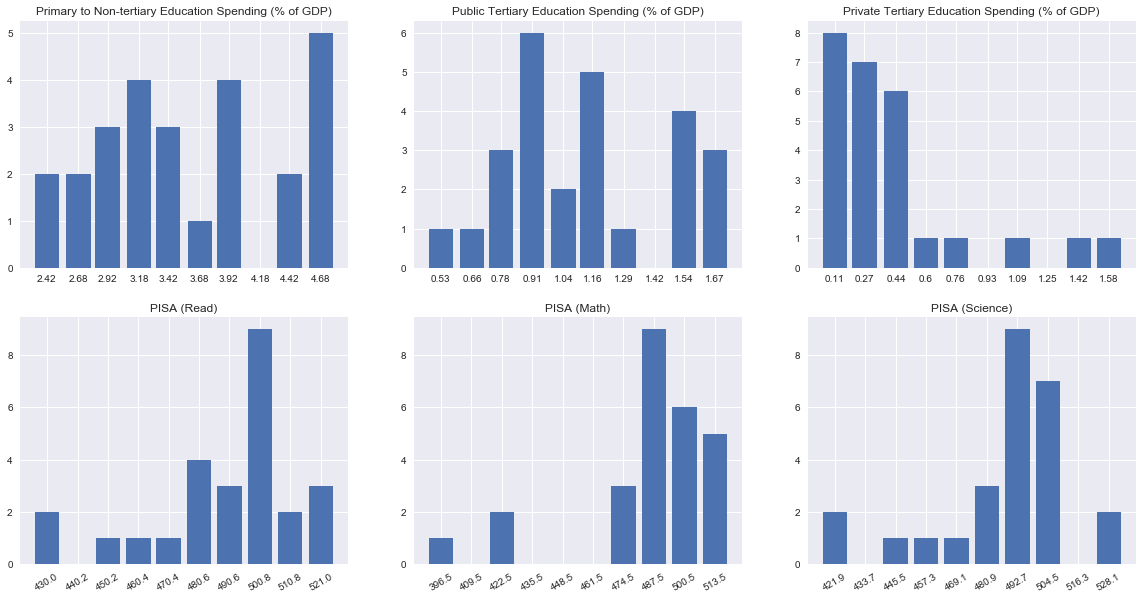

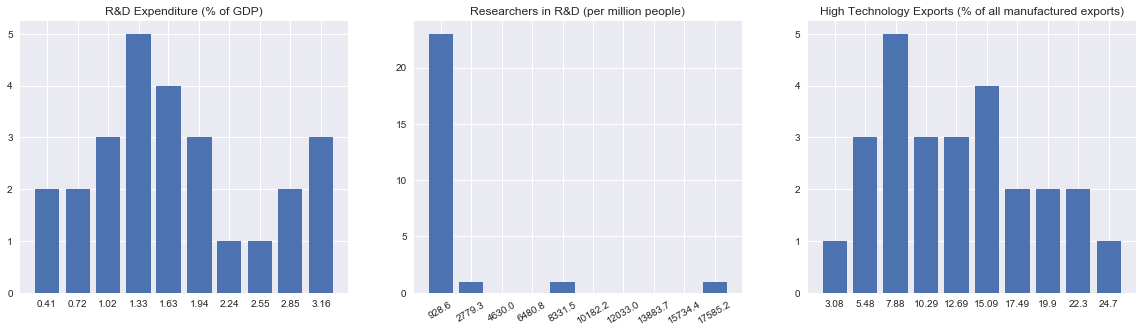

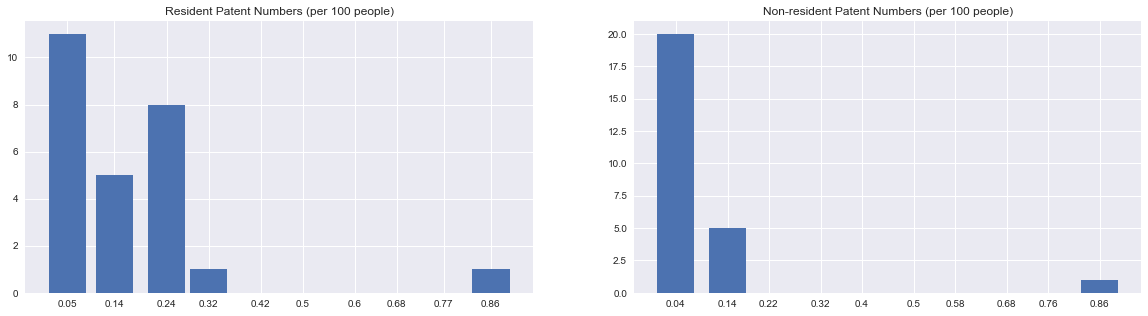

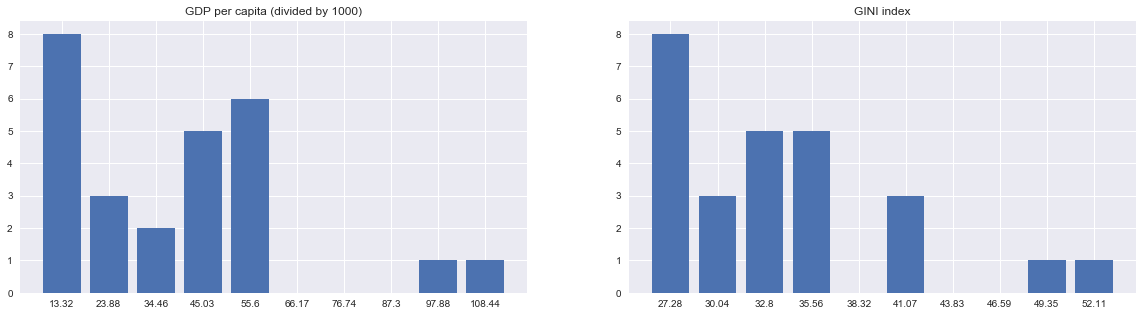

In [4]:
fig = plt.figure(figsize=(20, 10))

ax_pryntry = fig.add_subplot(2, 3, 1)
histogram(ax_pryntry, df_data[['pryntry']], "Primary to Non-tertiary Education Spending (% of GDP)")

ax_try_pub = fig.add_subplot(2, 3, 2)
histogram(ax_try_pub, df_data[['try_public']], "Public Tertiary Education Spending (% of GDP)")

ax_try_priv = fig.add_subplot(2, 3, 3)
histogram(ax_try_priv, df_data[['try_private']], "Private Tertiary Education Spending (% of GDP)")

ax_pisa_r = fig.add_subplot(2, 3, 4)
histogram(ax_pisa_r, df_data[['pisa_read']], "PISA (Read)", precision=1, rotation = 30)

ax_pisa_m = fig.add_subplot(2, 3, 5)
histogram(ax_pisa_m, df_data[['pisa_math']], "PISA (Math)", precision=1, rotation = 30)

ax_pisa_s = fig.add_subplot(2, 3, 6)
histogram(ax_pisa_s, df_data[['pisa_science']], "PISA (Science)", precision=1, rotation = 30)

fig = plt.figure(figsize=(20, 5))

ax_rd_exp = fig.add_subplot(1, 3, 1)
histogram(ax_rd_exp, df_data[['rd_exp']], "R&D Expenditure (% of GDP)")

ax_researchers_rd = fig.add_subplot(1, 3, 2)
histogram(ax_researchers_rd, df_data[['researchers_rd']], "Researchers in R&D (per million people)", precision=1, rotation=30)

ax_ht_exp = fig.add_subplot(1, 3, 3)
histogram(ax_ht_exp, df_data[['high_tech_exports']], "High Technology Exports (% of all manufactured exports)")

fig = plt.figure(figsize=(20, 5))

ax_patent_res = fig.add_subplot(1, 2, 1)
histogram(ax_patent_res, df_data[['patent_res']], "Resident Patent Numbers (per 100 people)")

ax_patent_nres = fig.add_subplot(1, 2, 2)
histogram(ax_patent_nres, df_data[['patent_nres']], "Non-resident Patent Numbers (per 100 people)")

fig = plt.figure(figsize=(20, 5))

ax_gdp_pc = fig.add_subplot(1, 2, 1)
histogram(ax_gdp_pc, df_data[['gdp_pc']], "GDP per capita (divided by 1000)")

ax_gini = fig.add_subplot(1, 2, 2)
histogram(ax_gini, df_data[['gini']], "GINI index")

plt.show()

Plot correlation matrix

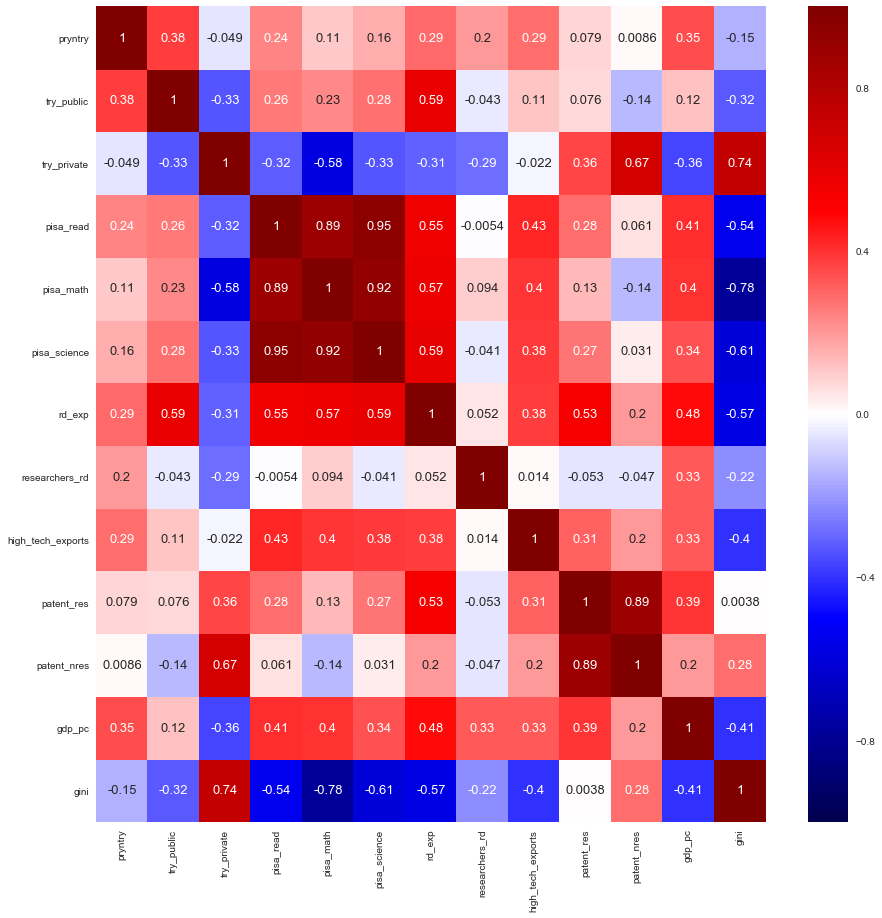

In [5]:
correlation_df = df_data.corr()

fig = plt.figure(figsize=(15,15))
sns.heatmap(correlation_df,annot=True, annot_kws={"size":13}, cmap=cm.seismic)
plt.show()

Plot scatterplot matrix

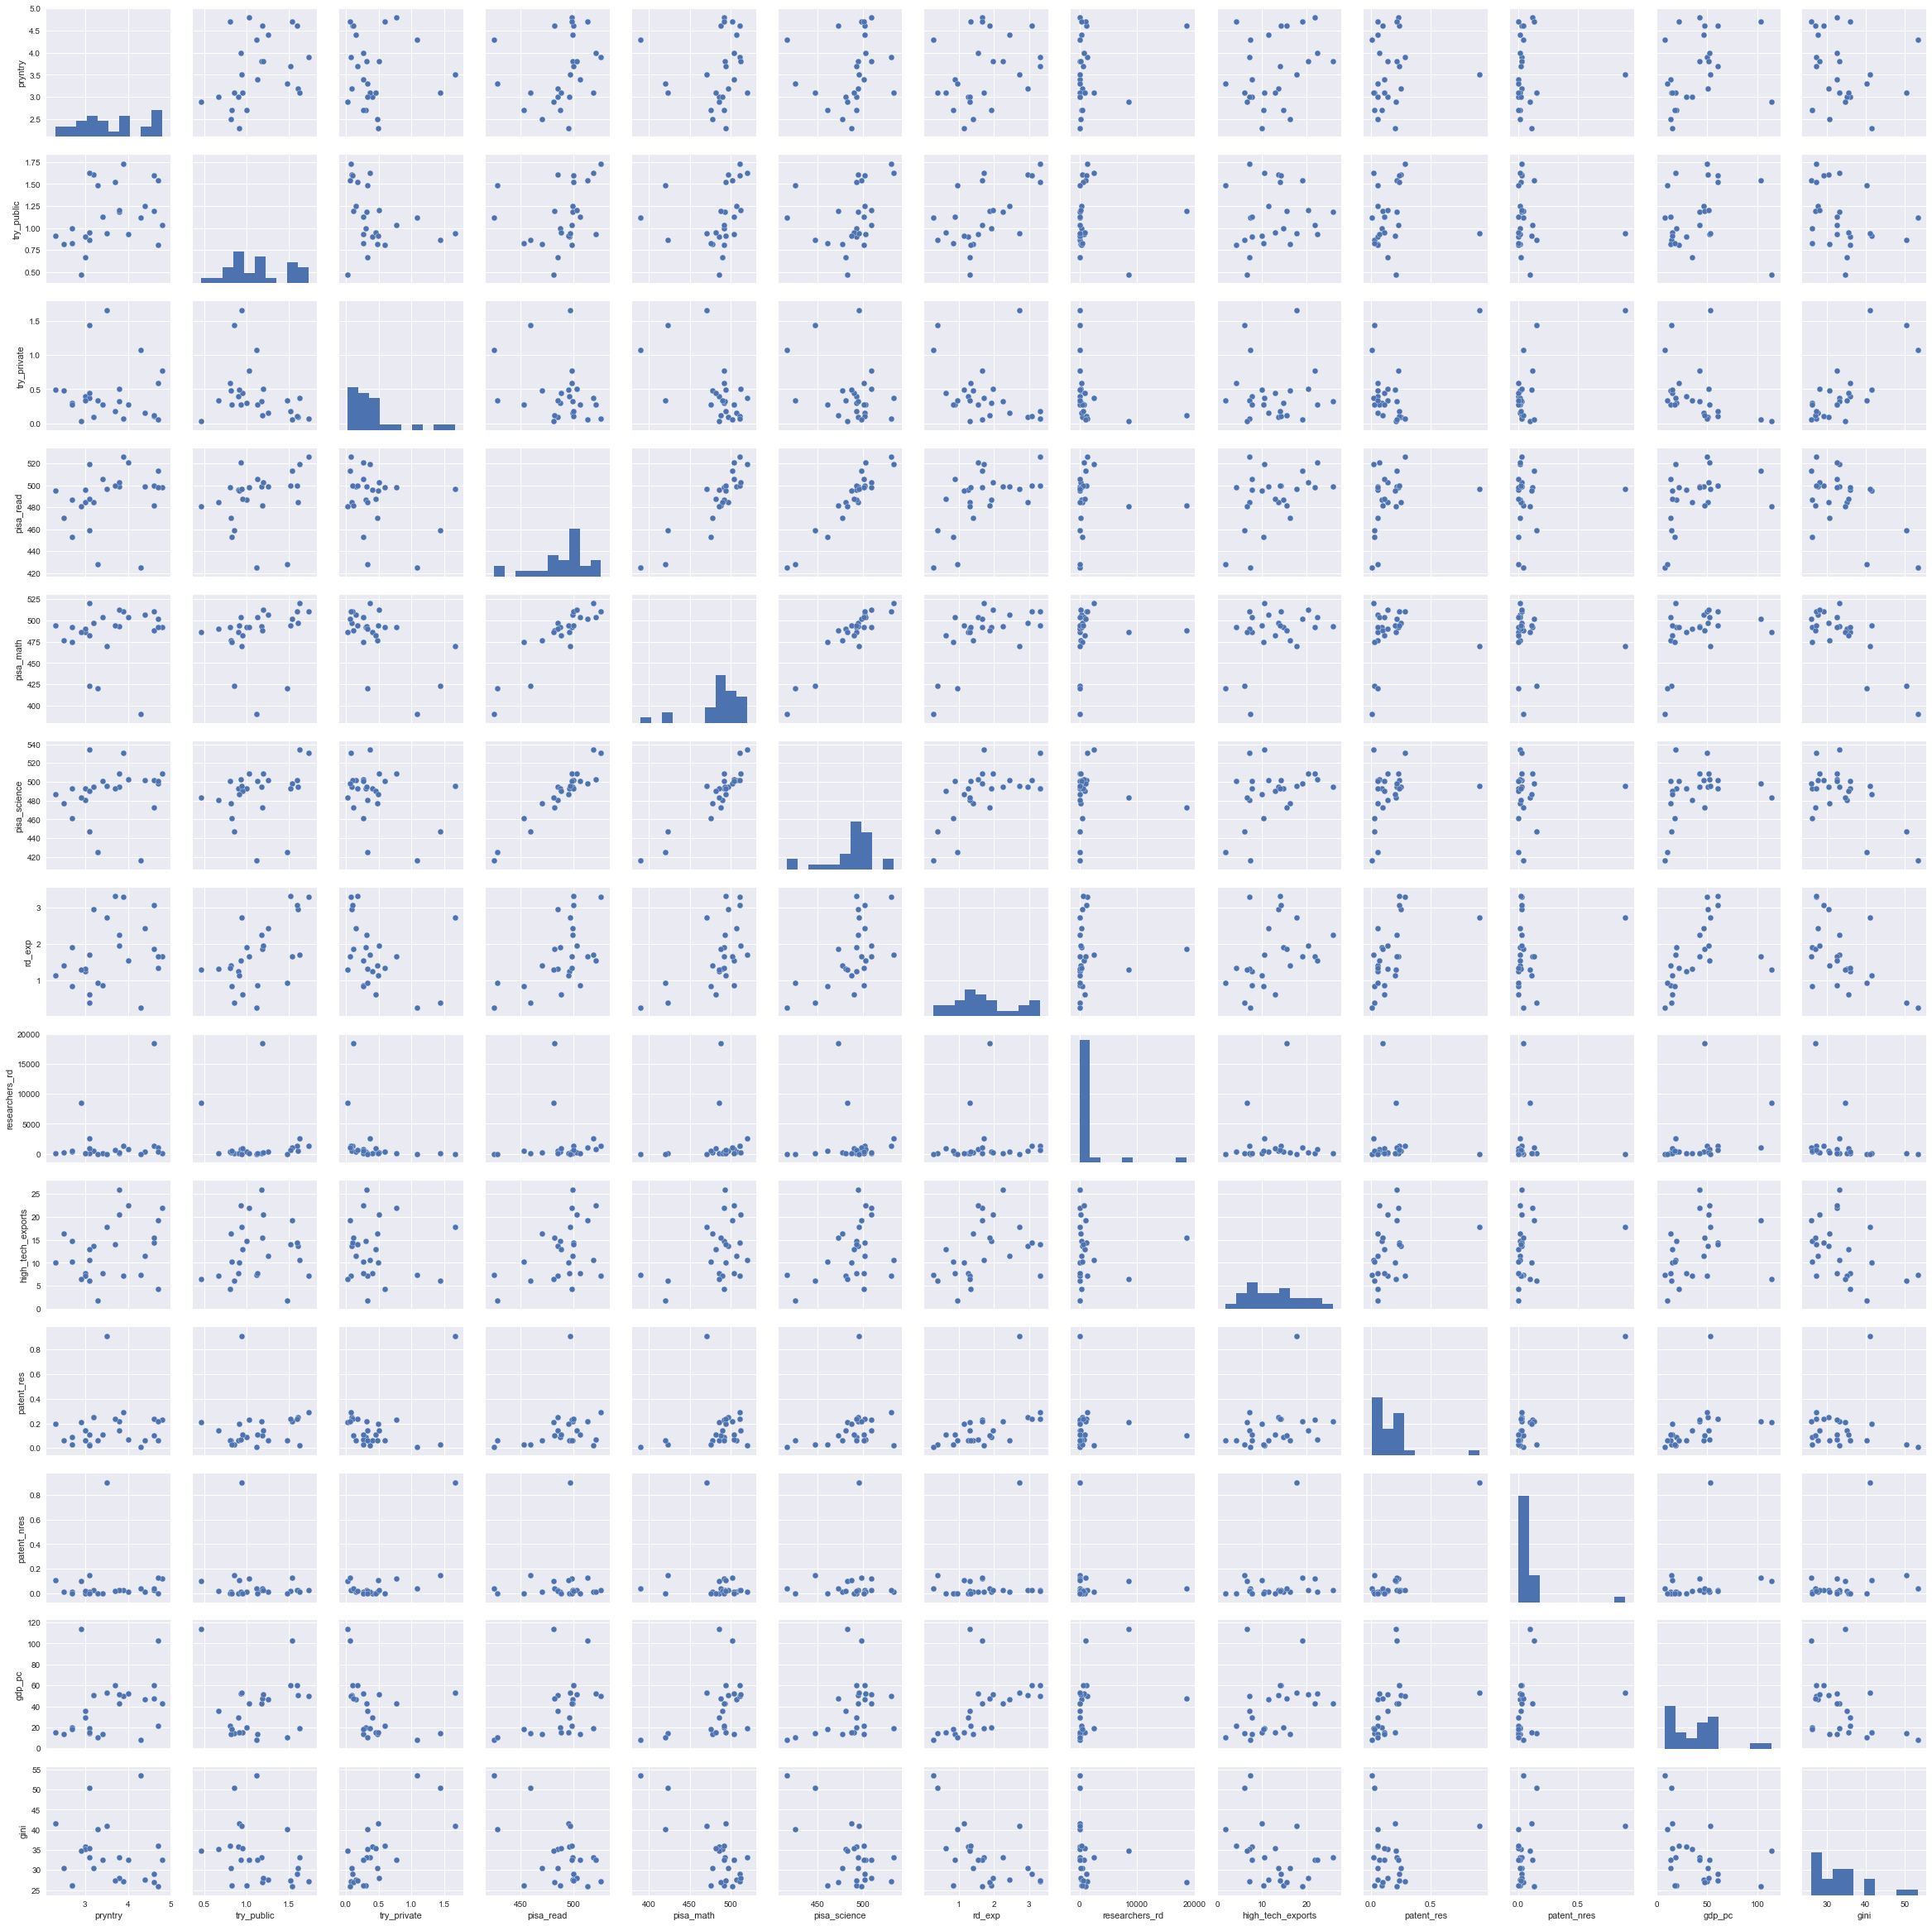

In [6]:
sns.pairplot(df_data)
plt.show()

Linear Regressions: I have chosen the best models for each dependent variable. 
Some of them were jointly insignificant, so that I didn't include them here.
You can find all the selecting the best model proccess in previous codes.

In [7]:
lm_pisaread = smf.ols(formula='pisa_read ~ pryntry', data=df).fit()
lm_pisaread.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pisa_read   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.431
Date:                Mon, 24 Apr 2017   Prob (F-statistic):              0.243
Time:                        19:36:03   Log-Likelihood:                -119.33
No. Observations:                  26   AIC:                             242.7
Df Residuals:                      24   BIC:                             245.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    460.6766     24.136     19.087      0.000       410.862   510.491
pryntry        7.8991      6.602      1.196      0.243        -5.727    21.526
==============================================================================
Omnibus:                       12.292   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.161
Skew:                          -1.320   Prob(JB):                      0.00377
Kurtosis:                       4.825   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
lm_pisamath = smf.ols(formula='pisa_math ~ pryntry', data=df).fit()
lm_pisamath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pisa_math   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.2818
Date:                Mon, 24 Apr 2017   Prob (F-statistic):              0.600
Time:                        19:36:05   Log-Likelihood:                -124.86
No. Observations:                  26   AIC:                             253.7
Df Residuals:                      24   BIC:                             256.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    469.5509     29.862     15.724      0.000       407.919   531.183
pryntry        4.3359      8.169      0.531      0.600       -12.523    21.195
==============================================================================
Omnibus:                       21.934   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.365
Skew:                          -1.961   Prob(JB):                     4.20e-07
Kurtosis:                       6.424   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
lm_rdexp = smf.ols(formula='rd_exp ~ pisa_math + try_public', data=df).fit()
lm_rdexp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rd_exp   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     13.66
Date:                Mon, 24 Apr 2017   Prob (F-statistic):           0.000123
Time:                        19:36:05   Log-Likelihood:                -22.486
No. Observations:                  26   AIC:                             50.97
Df Residuals:                      23   BIC:                             54.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.1143      1.965     -3.112      0.005       -10.178    -2.050
pisa_math      0.0132      0.004      3.177      0.004         0.005     0.022
try_public     1.2484      0.377      3.313      0.003         0.469     2.028
==============================================================================
Omnibus:                        1.216   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.349
Skew:                           0.223   Prob(JB):                        0.840
Kurtosis:                       3.351   Cond. No.                     7.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
lm_pisascience = smf.ols(formula='pisa_science ~ pryntry', data=df).fit()
lm_pisascience.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pisa_science   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.6572
Date:                Mon, 24 Apr 2017   Prob (F-statistic):              0.426
Time:                        19:36:06   Log-Likelihood:                -121.65
No. Observations:                  26   AIC:                             247.3
Df Residuals:                      24   BIC:                             249.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    467.3097     26.395     17.704      0.000       412.833   521.787
pryntry        5.8534      7.220      0.811      0.426        -9.049    20.755
==============================================================================
Omnibus:                       11.729   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.710
Skew:                          -1.212   Prob(JB):                      0.00472
Kurtosis:                       5.002   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lm_rdexp = smf.ols(formula='rd_exp ~ pisa_math + try_public', data=df).fit()
lm_rdexp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rd_exp   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     13.66
Date:                Mon, 24 Apr 2017   Prob (F-statistic):           0.000123
Time:                        19:36:07   Log-Likelihood:                -22.486
No. Observations:                  26   AIC:                             50.97
Df Residuals:                      23   BIC:                             54.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.1143      1.965     -3.112      0.005       -10.178    -2.050
pisa_math      0.0132      0.004      3.177      0.004         0.005     0.022
try_public     1.2484      0.377      3.313      0.003         0.469     2.028
==============================================================================
Omnibus:                        1.216   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.349
Skew:                           0.223   Prob(JB):                        0.840
Kurtosis:                       3.351   Cond. No.                     7.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
lm_researchersinrd = smf.ols(formula='rd_exp ~ try_public', data=df).fit()
lm_researchersinrd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rd_exp   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     12.50
Date:                Mon, 24 Apr 2017   Prob (F-statistic):            0.00169
Time:                        19:36:07   Log-Likelihood:                -27.215
No. Observations:                  26   AIC:                             58.43
Df Residuals:                      24   BIC:                             60.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0247      0.505     -0.049      0.961        -1.068     1.018
try_public     1.5226      0.431      3.535      0.002         0.634     2.411
==============================================================================
Omnibus:                        0.906   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.919
Skew:                          -0.337   Prob(JB):                        0.632
Kurtosis:                       2.373   Cond. No.                         7.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lm_hightechexports_unrestricted = smf.ols(formula='high_tech_exports ~ pisa_read + pisa_math + pisa_science + pryntry + try_public + try_private + rd_exp + researchers_rd_permillionpeople', data=df).fit()
lm_hightechexports_unrestricted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      high_tech_exports   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.177
Date:                Mon, 24 Apr 2017   Prob (F-statistic):              0.367
Time:                        19:36:08   Log-Likelihood:                -77.726
No. Observations:                  26   AIC:                             173.5
Df Residuals:                      17   BIC:                             184.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                         -42.4479     30.618     -1.386      0.184      -107.047    22.151
pisa_read                           0.0810      0.165      0.490      0.630        -0.268     0.430
pisa_math                           0.2583      0.176      1.467      0.161        -0.113     0.630
pisa_science                       -0.2502      0.207     -1.210      0.243        -0.686     0.186
pryntry                             1.8183      1.887      0.963      0.349        -2.164     5.801
try_public                          0.0212      5.373      0.004      0.997       -11.314    11.357
try_private                         7.8249      5.520      1.417      0.174        -3.822    19.472
rd_exp                              1.5125      2.105      0.718      0.482        -2.929     5.954
researchers_rd_permillionpeople   -8.8e-05      0.000     -0.253      0.803        -0.001     0.001
==============================================================================
Omnibus:                        0.630   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.335
Skew:                           0.274   Prob(JB):                        0.846
Kurtosis:                       2.907   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
lm_residentpatent = smf.ols(formula='patent_res_per100people ~ try_private + rd_exp', data=df).fit()
lm_residentpatent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     patent_res_per100people   R-squared:                       0.593
Model:                                 OLS   Adj. R-squared:                  0.558
Method:                      Least Squares   F-statistic:                     16.77
Date:                     Mon, 24 Apr 2017   Prob (F-statistic):           3.22e-05
Time:                             19:36:10   Log-Likelihood:                 20.641
No. Observations:                       26   AIC:                            -35.28
Df Residuals:                           23   BIC:                            -31.51
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.1913      0.065     -2.944      0.007        -0.326    -0.057
try_private     0.2518      0.060      4.184      0.000         0.127     0.376
rd_exp          0.1441      0.028      5.104      0.000         0.086     0.202
==============================================================================
Omnibus:                        3.717   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.381
Skew:                           0.724   Prob(JB):                        0.304
Kurtosis:                       3.313   Cond. No.                         7.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
lm_nonresidentpatent = smf.ols(formula='patent_nres_per100people ~ try_private + rd_exp', data=df).fit()
lm_nonresidentpatent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     patent_nres_per100people   R-squared:                       0.632
Model:                                  OLS   Adj. R-squared:                  0.600
Method:                       Least Squares   F-statistic:                     19.79
Date:                      Mon, 24 Apr 2017   Prob (F-statistic):           1.00e-05
Time:                              19:36:11   Log-Likelihood:                 21.938
No. Observations:                        26   AIC:                            -37.88
Df Residuals:                            23   BIC:                            -34.10
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.2328      0.062     -3.766      0.001        -0.361    -0.105
try_private     0.3485      0.057      6.087      0.000         0.230     0.467
rd_exp          0.0912      0.027      3.397      0.002         0.036     0.147
==============================================================================
Omnibus:                        9.820   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.959
Skew:                           1.199   Prob(JB):                       0.0187
Kurtosis:                       4.264   Cond. No.                         7.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lm_gdppercapita = smf.ols(formula='gdp_percapita_dividedby1000 ~ pryntry + try_private + patent_nres_per100people', data=df).fit()
lm_gdppercapita.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     gdp_percapita_dividedby1000   R-squared:                       0.577
Model:                                     OLS   Adj. R-squared:                  0.519
Method:                          Least Squares   F-statistic:                     9.983
Date:                         Mon, 24 Apr 2017   Prob (F-statistic):           0.000238
Time:                                 19:36:12   Log-Likelihood:                -110.64
No. Observations:                           26   AIC:                             229.3
Df Residuals:                               22   BIC:                             234.3
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   16.6791     18.833      0.886      0.385       -22.377    55.736
pryntry                     10.6455      4.950      2.150      0.043         0.379    20.912
try_private                -57.1964     12.308     -4.647      0.000       -82.721   -31.672
patent_nres_per100people   119.3021     28.553      4.178      0.000        60.088   178.516
==============================================================================
Omnibus:                       14.615   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.975
Skew:                           1.431   Prob(JB):                     0.000560
Kurtosis:                       5.373   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lm_gini = smf.ols(formula='gini_index ~ pisa_read + pisa_math', data=df).fit()
lm_gini.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gini_index   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     30.31
Date:                Mon, 24 Apr 2017   Prob (F-statistic):           3.57e-07
Time:                        19:36:12   Log-Likelihood:                -70.649
No. Observations:                  26   AIC:                             147.3
Df Residuals:                      23   BIC:                             151.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     95.5228     15.417      6.196      0.000        63.630   127.415
pisa_read      0.2079      0.068      3.063      0.006         0.067     0.348
pisa_math     -0.3373      0.056     -6.006      0.000        -0.453    -0.221
==============================================================================
Omnibus:                        1.143   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                0.336
Skew:                           0.236   Prob(JB):                        0.845
Kurtosis:                       3.297   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""